In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv('spam.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


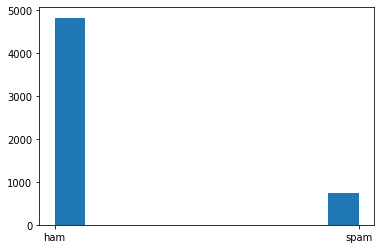

In [9]:
plt.hist(data['Category'])
plt.show()

In [10]:
data['Category'][data['Category'] == 'ham'] = 0
data['Category'][data['Category'] == 'spam'] = 1
corpus = data['Message'].values
labels = data['Category'].values
tfidfvectorizer = TfidfVectorizer(stop_words='english')
tfidf_data = tfidfvectorizer.fit_transform(corpus)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_data, labels, test_size = 0.3, random_state = 42)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [12]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [22]:
print('Confusion matrix: \n',confusion_matrix(y_test, y_pred))
print('Accuracy: {}%'.format(round(accuracy_score(y_test, y_pred), 2) * 100))
print('Precision: {}%'.format(round(precision_score(y_test, y_pred), 2) * 100))
print('Recall: {}%'.format(round(recall_score(y_test, y_pred), 2) * 100))
print('f1-score: {}%'.format(round(f1_score(y_test, y_pred), 2) * 100))

Confusion matrix: 
 [[1447    1]
 [  72  152]]
Accuracy: 96.0%
Precision: 99.0%
Recall: 68.0%
f1-score: 81.0%
